<a href="https://colab.research.google.com/github/Kgs-Mathaba/Deep_Learning_with_Python/blob/main/Copy_of_Introduction_to_deep_learning_for_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape = (28,28,1)) # Very important the input shape = (image_height, image_width, image_channels)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/ 255

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels,epochs=4, batch_size = 64)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/4
938/938 [==============================] - 21s 9ms/step - loss: 0.1540 - accuracy: 0.9522
Epoch 2/4
938/938 [==============================] - 8s 9ms/step - loss: 0.0434 - accuracy: 0.9865
Epoch 3/4
938/938 [==============================] - 8s 8ms/step - loss: 0.0309 - accuracy: 0.9905
Epoch 4/4
938/938 [==============================] - 8s 8ms/step - loss: 0.0232 - accuracy: 0.9927


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.3f}')

313/313 [==============================] - 2s 4ms/step - loss: 0.0282 - accuracy: 0.9914
Test accuracy: 0.991


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kagisomathaba","key":"86dda7f4afe43fe275064e8184e9c327"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.9 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=b00701764ad8fe5c927b9f926987cab01aeb378a2490805d50f1a48c45901f9e
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# download data from kaggle
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:23<00:00, 62.4MB/s]
100% 812M/812M [00:23<00:00, 36.9MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

def make_subset(subset_name, start_index, end_index):
  for category in ('cat', 'dog'):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir, exist_ok=True)
    fnames = [f'{category}.{i}.jpg'
              for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname,
                      dst=dir / fname)

make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2500) 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size = (180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size = (180, 180),
    batch_size = 32)

test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size = (180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print('data batch shape:', data_batch.shape)
  print('label batch shape:', labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
label batch shape: (32,)


In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
      filepath = 'covnet_from_scratch.keras',
      save_best_only=True,
      monitor='val_loss'
  )
]

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data = validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 7s 113ms/step - loss: 0.1820 - accuracy: 0.9320 - val_loss: 0.9245 - val_accuracy: 0.8550
Epoch 2/30
63/63 [==============================] - 7s 111ms/step - loss: 0.2119 - accuracy: 0.9365 - val_loss: 0.7175 - val_accuracy: 0.8490
Epoch 3/30
63/63 [==============================] - 7s 111ms/step - loss: 0.1901 - accuracy: 0.9315 - val_loss: 0.6117 - val_accuracy: 0.8430
Epoch 4/30
63/63 [==============================] - 7s 113ms/step - loss: 0.1553 - accuracy: 0.9455 - val_loss: 1.6150 - val_accuracy: 0.8170
Epoch 5/30
63/63 [==============================] - 7s 111ms/step - loss: 0.1926 - accuracy: 0.9400 - val_loss: 0.5323 - val_accuracy: 0.8650
Epoch 6/30
63/63 [==============================] - 7s 110ms/step - loss: 0.1802 - accuracy: 0.9395 - val_loss: 0.6685 - val_accuracy: 0.8370
Epoch 7/30
63/63 [==============================] - 7s 110ms/step - loss: 0.1985 - accuracy: 0.9405 - val_loss: 1.6936 - val_accuracy: 0.8100
Epoch 

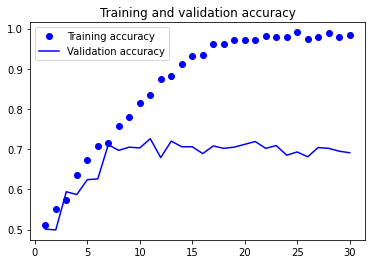

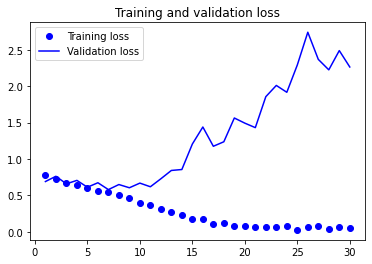

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("covnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

63/63 [==============================] - 3s 46ms/step - loss: 0.6030 - accuracy: 0.7020
Test accuracy: 0.702


In [ ]:
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip('horizontal'),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.2),
    ]
)

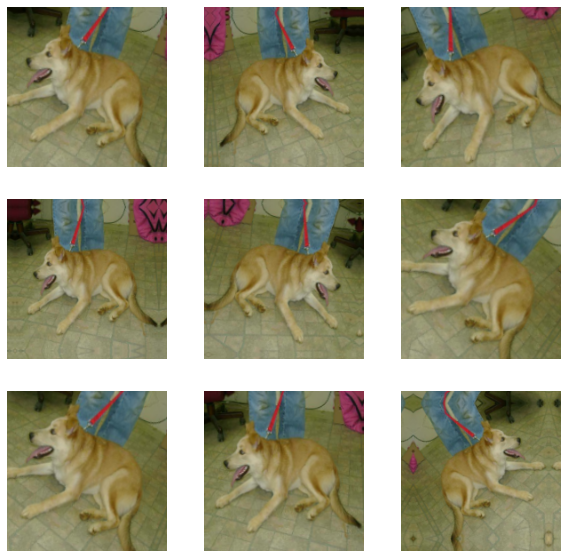

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
      filepath = 'covnet_from_scratch_with_augmentation.keras',
      save_best_only=True,
      monitor='val_loss'
  )
]

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data = validation_dataset,
                    callbacks = callbacks)

Epoch 1/100
63/63 [==============================] - 9s 115ms/step - loss: 0.7094 - accuracy: 0.5085 - val_loss: 0.6900 - val_accuracy: 0.5450
Epoch 2/100
63/63 [==============================] - 7s 112ms/step - loss: 0.6953 - accuracy: 0.5275 - val_loss: 0.6827 - val_accuracy: 0.5730
Epoch 3/100
63/63 [==============================] - 7s 113ms/step - loss: 0.6872 - accuracy: 0.5905 - val_loss: 0.6553 - val_accuracy: 0.6050
Epoch 4/100
63/63 [==============================] - 7s 111ms/step - loss: 0.6566 - accuracy: 0.6325 - val_loss: 0.6652 - val_accuracy: 0.6020
Epoch 5/100
63/63 [==============================] - 7s 112ms/step - loss: 0.6451 - accuracy: 0.6585 - val_loss: 0.6250 - val_accuracy: 0.6420
Epoch 6/100
63/63 [==============================] - 7s 111ms/step - loss: 0.6195 - accuracy: 0.6705 - val_loss: 0.5915 - val_accuracy: 0.6800
Epoch 7/100
63/63 [==============================] - 7s 111ms/step - loss: 0.5987 - accuracy: 0.6895 - val_loss: 0.5991 - val_accuracy: 0.6780

In [ ]:
test_model = keras.models.load_model(
    'covnet_from_scratch_with_augmentation.keras'
)

test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')


63/63 [==============================] - 3s 47ms/step - loss: 0.4865 - accuracy: 0.8325
Test accuracy: 0.832


In [ ]:
# Instantiate VGG16 model
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3)
)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

(2000, 5, 5, 512)

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.compile(loss = 'binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

callbacks = [
  keras.callbacks.ModelCheckpoint(
      filepath = 'feature_extraction.keras',
      save_best_only=True,
      monitor='val_loss'
  )
]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data = (val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 12.1139 - accuracy: 0.9340 - val_loss: 4.4318 - val_accuracy: 0.9710
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 4.0257 - accuracy: 0.9725 - val_loss: 6.3841 - val_accuracy: 0.9690
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 2.2533 - accuracy: 0.9885 - val_loss: 9.4297 - val_accuracy: 0.9590
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.9562 - accuracy: 0.9880 - val_loss: 4.8918 - val_accuracy: 0.9800
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 0.6219 - accuracy: 0.9945 - val_loss: 5.7113 - val_accuracy: 0.9780
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 0.3130 - accuracy: 0.9960 - val_loss: 3.8031 - val_accuracy: 0.9800
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.7985 - accuracy: 0.9925 - val_loss: 4.4000 - val_accuracy: 0.9810
Epoch 8/20
63/6

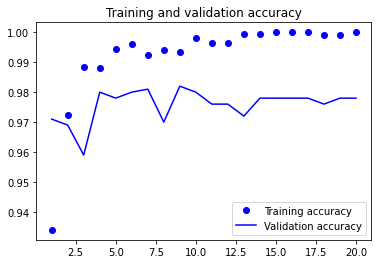

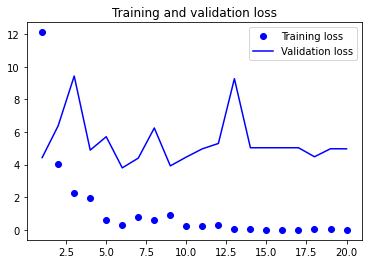

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
)
conv_base.trainable = False

In [ ]:
conv_base.trainable = True
print('This is the number of trainable weights '
      'before freezing the conv base:', len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print('This is the number of trainable weights '
      'after freezing the conv base:', len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [ ]:
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip('horizontal'),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
      filepath = 'feature_extraction_with_data_augmentation.keras',
      save_best_only=True,
      monitor='val_loss'
  )
]

history = model.fit(
    train_dataset,
    epochs = 50,
    validation_data = validation_dataset,
    callbacks=callbacks
)

Epoch 1/50
63/63 [==============================] - 21s 305ms/step - loss: 15.3135 - accuracy: 0.8960 - val_loss: 17.7985 - val_accuracy: 0.9090
Epoch 2/50
63/63 [==============================] - 19s 303ms/step - loss: 6.0922 - accuracy: 0.9435 - val_loss: 4.6732 - val_accuracy: 0.9690
Epoch 3/50
63/63 [==============================] - 19s 302ms/step - loss: 4.9250 - accuracy: 0.9540 - val_loss: 1.7396 - val_accuracy: 0.9830
Epoch 4/50
63/63 [==============================] - 19s 297ms/step - loss: 4.4626 - accuracy: 0.9640 - val_loss: 7.8351 - val_accuracy: 0.9630
Epoch 5/50
63/63 [==============================] - 19s 296ms/step - loss: 3.4659 - accuracy: 0.9725 - val_loss: 2.9308 - val_accuracy: 0.9740
Epoch 6/50
63/63 [==============================] - 19s 296ms/step - loss: 4.4301 - accuracy: 0.9655 - val_loss: 8.3740 - val_accuracy: 0.9540
Epoch 7/50
63/63 [==============================] - 19s 297ms/step - loss: 2.9502 - accuracy: 0.9750 - val_loss: 4.1424 - val_accuracy: 0.97

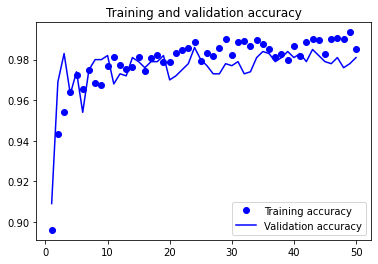

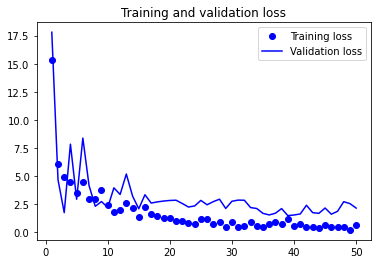

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    'feature_extraction_with_data_augmentation.keras'
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

63/63 [==============================] - 12s 188ms/step - loss: 2.2580 - accuracy: 0.9735
Test accuracy: 0.974


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
conv_base.trainable= True
for layer in conv_base.layers[:-4]:
  layer.trainable = False

In [ ]:
# Fine tune with low learning rate
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

callbacks = [
  keras.callbacks.ModelCheckpoint(
      filepath='fine_tuning.keras',
      save_best_only=True,
      monitor='val_loss'
  )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data = validation_dataset,
    callbacks = callbacks
)

Epoch 1/30
63/63 [==============================] - 23s 335ms/step - loss: 0.3473 - accuracy: 0.9905 - val_loss: 1.6982 - val_accuracy: 0.9820
Epoch 2/30
63/63 [==============================] - 21s 331ms/step - loss: 0.3001 - accuracy: 0.9940 - val_loss: 1.6491 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 21s 326ms/step - loss: 0.1237 - accuracy: 0.9955 - val_loss: 1.6897 - val_accuracy: 0.9820
Epoch 4/30
63/63 [==============================] - 21s 331ms/step - loss: 0.2209 - accuracy: 0.9930 - val_loss: 1.5145 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 21s 327ms/step - loss: 0.2135 - accuracy: 0.9920 - val_loss: 1.8705 - val_accuracy: 0.9760
Epoch 6/30
63/63 [==============================] - 21s 325ms/step - loss: 0.2374 - accuracy: 0.9925 - val_loss: 1.7556 - val_accuracy: 0.9780
Epoch 7/30
63/63 [==============================] - 21s 326ms/step - loss: 0.2980 - accuracy: 0.9935 - val_loss: 2.4506 - val_accuracy: 0.9760

In [ ]:
model = keras.models.load_model('fine_tuning.keras')
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

63/63 [==============================] - 12s 187ms/step - loss: 1.3696 - accuracy: 0.9795
Test accuracy: 0.979
